In [253]:
import math
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [254]:
# original data set
data = pd.read_csv("./Python/data/diamonds.csv")
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data['price'] = data['price'].astype(float)
attributes = ["carat",'cut', 'color', 'clarity', "depth","table",'price','x', 'y','z']
continuous = ["carat","depth","table",'x', 'y','z','price']
for i in range(len(data['price'])):
#     data['price',i] = np.log(data['price',i])
    data.loc[i,"price"]= np.log(data.loc[i,'price'])

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,5.786897,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,5.789960,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,5.814131,4.34,4.35,2.75


In [255]:
# transforming categorical variables to c
le = preprocessing.LabelEncoder()
cut = data['cut']
clarity = data['clarity']
color = data['color']

le.fit(cut)
new_cut = le.transform(cut)
le.fit(clarity)
new_clarity = le.transform(clarity)
le.fit(color)
new_color = le.transform(color)

df_cut = pd.DataFrame(data = new_cut)
df_color = pd.DataFrame(data = new_color)
df_clarity = pd.DataFrame(data = new_clarity)

data['cut'] = df_cut
data['color'] = df_color
data['clarity'] = df_clarity
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,5.786897,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,5.789960,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,5.814131,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,7.921898,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,7.921898,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,7.921898,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,7.921898,6.15,6.12,3.74


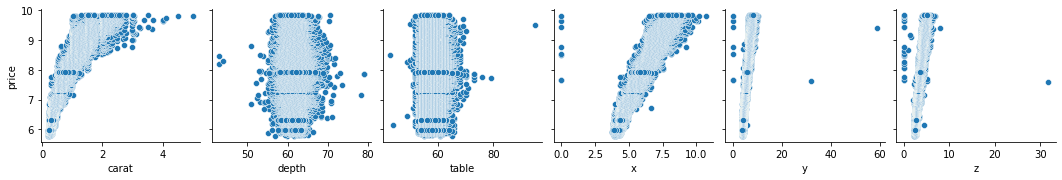

In [256]:
sns.pairplot(data=data,x_vars=continuous[:-1],y_vars="price",diag_kind=None)

<AxesSubplot:xlabel='z'>

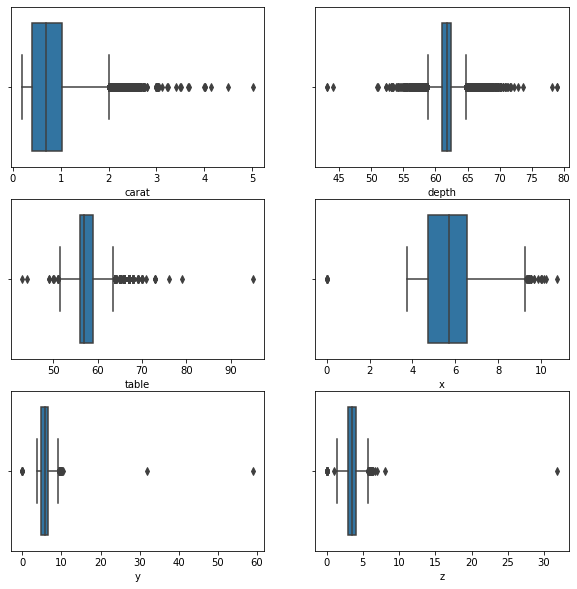

In [257]:
fig,ax = plt.subplots(3,2,figsize=(10,10))
sns.boxplot(x = data['carat'], ax = ax[0,0])
sns.boxplot(x = data['depth'], ax = ax[0,1])
sns.boxplot(x = data['table'], ax = ax[1,0])
sns.boxplot(x = data['x'], ax = ax[1,1])
sns.boxplot(x = data['y'], ax = ax[2,0])
sns.boxplot(x = data['z'], ax = ax[2,1])

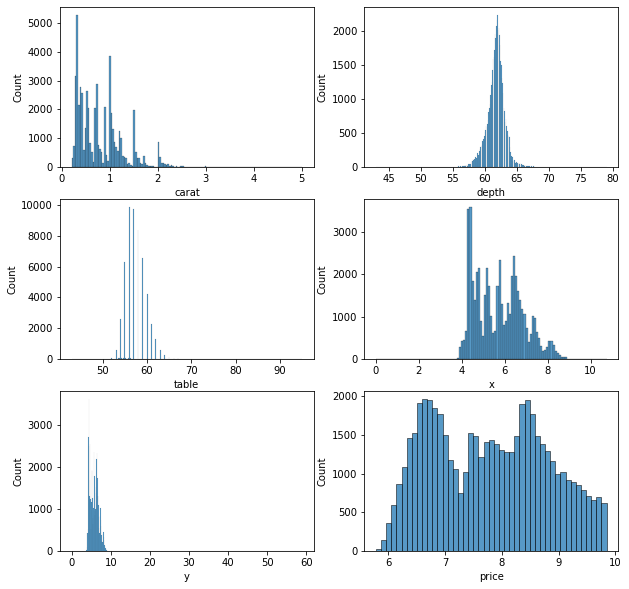

In [258]:
fig,ax = plt.subplots(3,2,figsize=(10,10))
sns.histplot(data['carat'], ax = ax[0,0])
sns.histplot(data['depth'], ax = ax[0,1])
sns.histplot(data['table'], ax = ax[1,0])
sns.histplot(data['x'], ax = ax[1,1])
sns.histplot(data['y'], ax = ax[2,0])
sns.histplot(data['price'], ax = ax[2,1])

plt.show()

In [276]:
X = data.drop(['price'], axis = 1)
y = data['price']
kf = KFold(n_splits = 10)

mae_l = []
mse_l = []
rmse_l = []
r2_l = []
ar2_l = []

mae_k = []
mse_k = []
rmse_k = []
r2_k = []
ar2_k = []

mae_r = []
mse_r = []
rmse_r = []
r2_r = []
ar2_r = []

n = 53940
k= 9

for i in range(1,10):
    mae_l_avg = []
    mse_l_avg = []
    rmse_l_avg = []
    r2_l_avg = []
    ar2_l_avg = []
    
    mae_k_avg = []
    mse_k_avg = []
    rmse_k_avg = []
    r2_k_avg = []
    ar2_k_avg = []
    
    mae_r_avg = []
    mse_r_avg = []
    rmse_r_avg = []
    r2_r_avg = []
    ar2_r_avg = []
    
    for train,test in kf.split(X):
        lin = LinearRegression()
        knn = KNeighborsRegressor(n_neighbors = i)
        regr = RandomForestRegressor(max_depth=i, random_state=0)
        
        X_train , X_test = X.iloc[train], X.iloc[test]
        y_train , y_test = y[train], y[test]
    
    
        lin.fit(X_train, y_train)
        lin_pred = lin.predict(X_test)
    
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        
        regr.fit(X_train, y_train)
        regr_pred = regr.predict(X_test)
        
        
        mae_lin = metrics.mean_absolute_error(y_test, lin_pred)
        mse_lin = metrics.mean_squared_error(y_test, lin_pred)
        rmse_lin = np.sqrt(mse_lin)  
        r2_lin = r2_score(y_true = y_test, y_pred = lin_pred)
        ar2_lin = 1 - ((1 - r2_lin)*((n - 1)/(n - k - 1)))
        
        mae_knn = metrics.mean_absolute_error(y_test, knn_pred)
        mse_knn = metrics.mean_squared_error(y_test, knn_pred)
        rmse_knn = np.sqrt(mse_knn)  
        r2_knn = r2_score(y_true = y_test, y_pred = knn_pred)
        ar2_knn = 1 - ((1 - r2_knn)*((n - 1)/(n - k - 1)))
        
        mae_regr = metrics.mean_absolute_error(y_test, regr_pred)
        mse_regr = metrics.mean_squared_error(y_test, regr_pred)
        rmse_regr = np.sqrt(mse_regr)  
        r2_regr = r2_score(y_true = y_test, y_pred = regr_pred)
        ar2_regr = 1 - ((1 - r2_regr)*((n - 1)/(n - k - 1)))
        
        mae_l_avg.append(mae_lin)
        mse_l_avg.append(mse_lin)
        rmse_l_avg.append(rmse_lin)
        r2_l_avg.append(r2_lin)
        ar2_l_avg.append(ar2_lin)
        
        mae_k_avg.append(mae_knn)
        mse_k_avg.append(mse_knn)
        rmse_k_avg.append(rmse_knn)
        r2_k_avg.append(r2_knn)
        ar2_k_avg.append(ar2_knn)
        
        mae_r_avg.append(mae_regr)
        mse_r_avg.append(mse_regr)
        rmse_r_avg.append(rmse_regr)
        r2_r_avg.append(r2_regr)
        ar2_r_avg.append(ar2_regr)
        
        
    mae_l.append(sum(mae_l_avg)/len(mae_l_avg))
    mse_l.append(sum(mse_l_avg)/len(mse_l_avg))
    rmse_l.append(sum(rmse_l_avg)/len(rmse_l_avg))
    r2_l.append(sum(r2_l_avg)/len(r2_l_avg))
    ar2_l.append(sum(ar2_l_avg)/len(ar2_l_avg))
    
    mae_k.append(sum(mae_k_avg)/len(mae_k_avg))
    mse_k.append(sum(mse_k_avg)/len(mse_k_avg))
    rmse_k.append(sum(rmse_k_avg)/len(rmse_k_avg))
    r2_k.append(sum(r2_k_avg)/len(r2_k_avg))
    ar2_k.append(sum(ar2_k_avg)/len(ar2_k_avg))
    
    mae_r.append(sum(mae_r_avg)/len(mae_r_avg))
    mse_r.append(sum(mse_r_avg)/len(mse_r_avg))
    rmse_r.append(sum(rmse_r_avg)/len(rmse_r_avg))
    r2_r.append(sum(r2_r_avg)/len(r2_r_avg))
    ar2_r.append(sum(ar2_r_avg)/len(ar2_r_avg))

print("Linear Regression Results")
print("MAE:",sum(mae_l)/len(mae_l))
print("MSE:", sum(mse_l)/len(mse_l))
print("RMSE:", sum(rmse_l)/len(rmse_l))
print("R-Squared:", sum(r2_l)/len(r2_l))
print("Adjusted R-Squared:", sum(ar2_l)/len(ar2_l))
print()
print("K Neighbors Regression Results")
print("MAE:",sum(mae_k)/len(mae_k))
print("MSE:", sum(mse_k)/len(mse_k))
print("RMSE:", sum(rmse_k)/len(rmse_k))
print("R-Squared:", sum(r2_k)/len(r2_k))
print("Adjusted R-Squared:", sum(ar2_k)/len(ar2_k))
print()
print("Random Forest Regression Results")
print("MAE:",sum(mae_r)/len(mae_r))
print("MSE:", sum(mse_r)/len(mse_r))
print("RMSE:", sum(rmse_r)/len(rmse_r))
print("R-Squared:", sum(r2_r)/len(r2_r))
print("Adjusted R-Squared:", sum(ar2_r)/len(ar2_r))


Linear Regression Results
MAE: 0.16682135396829675
MSE: 0.05951245317349433
RMSE: 0.2395491956070263
R-Squared: 0.6741266881399898
Adjusted R-Squared: 0.6740723054252347

K Neighbors Regression Results
MAE: 0.21601270579311022
MSE: 0.07122195980113974
RMSE: 0.2631935016814649
R-Squared: 0.5937996337390246
Adjusted R-Squared: 0.5937318458047328

Random Forest Regression Results
MAE: 0.2783586764837852
MSE: 0.1256211555160656
RMSE: 0.31478155760695425
R-Squared: 0.41587750112933514
Adjusted R-Squared: 0.41578002101641404


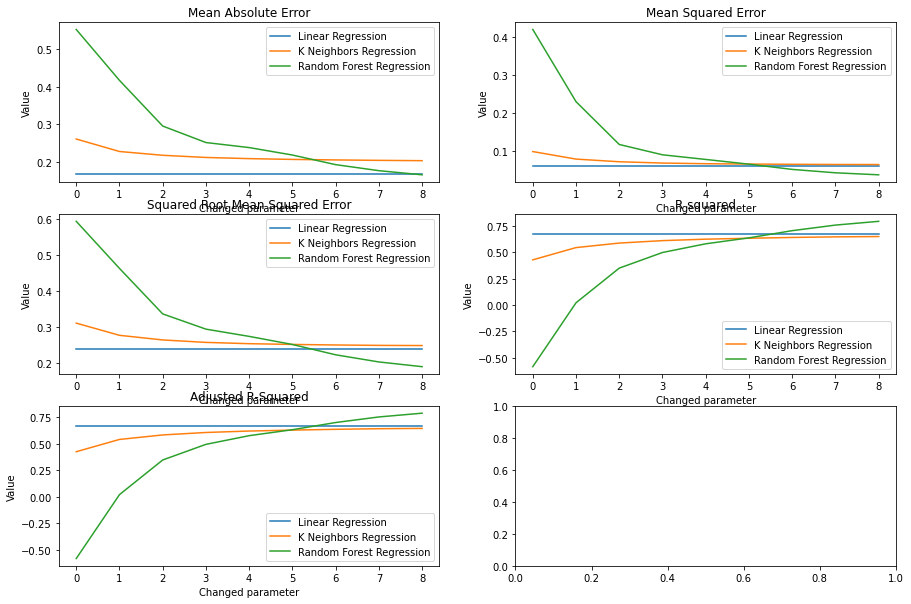

In [279]:
fig, ax = plt.subplots(3,2, figsize = (15,10))
ax[0,0].title.set_text("Mean Absolute Error")
ax[0,0].plot(mae_l, label = "Linear Regression")
ax[0,0].plot(mae_k, label = "K Neighbors Regression")
ax[0,0].plot(mae_r, label = "Random Forest Regression")
ax[0,0].set_xlabel("Changed parameter")
ax[0,0].set_ylabel("Value")
ax[0,0].legend()
ax[0,1].title.set_text("Mean Squared Error")
ax[0,1].plot(mse_l, label = "Linear Regression")
ax[0,1].plot(mse_k, label = "K Neighbors Regression")
ax[0,1].plot(mse_r, label = "Random Forest Regression")
ax[0,1].set_xlabel("Changed parameter")
ax[0,1].set_ylabel("Value")
ax[0,1].legend()
ax[1,0].title.set_text("Squared Root Mean Squared Error")
ax[1,0].plot(rmse_l, label = "Linear Regression")
ax[1,0].plot(rmse_k, label = "K Neighbors Regression")
ax[1,0].plot(rmse_r, label = "Random Forest Regression")
ax[1,0].set_xlabel("Changed parameter")
ax[1,0].set_ylabel("Value")
ax[1,0].legend()
ax[1,1].title.set_text("R squared")
ax[1,1].plot(r2_l, label = "Linear Regression")
ax[1,1].plot(r2_k, label = "K Neighbors Regression")
ax[1,1].plot(r2_r, label = "Random Forest Regression")
ax[1,1].set_xlabel("Changed parameter")
ax[1,1].set_ylabel("Value")
ax[1,1].legend()
ax[2,0].title.set_text("Adjusted R-Squared")
ax[2,0].plot(ar2_l, label = "Linear Regression")
ax[2,0].plot(ar2_k, label = "K Neighbors Regression")
ax[2,0].plot(ar2_r, label = "Random Forest Regression")
ax[2,0].set_xlabel("Changed parameter")
ax[2,0].set_ylabel("Value")
ax[2,0].legend()
plt.show()